<a href="https://colab.research.google.com/github/Umerfarooq122/Panel-Regression-in-Python/blob/main/Blog_5_Panel_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pooled, Random Effects and Fixed Effects Regression in Python:**



A panel dataset, also known as cross-sectional time-series or longitudinal data, is a dataset that, in theory, offers multiple measurements of a variety of variables across time on observable units, such as people, homes, businesses, cities, and states.

A time-series data set comprises observations on one or more variables over many time periods, while a cross-sectional data set has observations on a certain number of variables at a specific point in time.



A panel dataset may contain as little as two repeated measurements of the same variables on the same population or sample. It is simple to think of a panel data as a three-dimensional structure for each variable, with time serving as the vertical axis and many observations serving as the horizontal dimension.

## **Loading ad Preprocessing the dataset:**

In [1]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from linearmodels import PooledOLS
import statsmodels.api as sm
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/Panel-Regression-in-Python/main/PanelData.csv')

In [4]:
df.head()

,I,T,C,Q,PF,LF
0,1,1,1140640,0.952757,106650,0.534487
1,1,2,1215690,0.986757,110307,0.532328
2,1,3,1309570,1.091980,110574,0.547736
3,1,4,1511530,1.175780,121974,0.540846
4,1,5,1676730,1.160170,196606,0.591167


In the dataset above, the variables used are:

I = Airline,

T = Year,

PF = Fuel price,

LF = Load factor, the average capacity utilization of the fleet.

Q = Output, in revenue passenger miles, index number,

C = Total cost, in $1000, the data

Let's look for the missing values in the data set

In [5]:
df.isna().sum()

I     0
T     0
C     0
Q     0
PF    0
LF    0
dtype: int64

As we can see that there are no mising values in the data set which is good thing. We can go ahead and check the balance of data set.

In [6]:
pd.crosstab(df['I'], df['T'], margins=False)

T,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
I,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Similarly correlation among the variables in data set.

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,I,T,C,Q,PF,LF
I,1.000000,0.000000,-0.708624,-0.867936,0.013294,-0.339957
T,0.000000,1.000000,0.500027,0.271114,0.931188,0.600149
C,-0.708624,0.500027,1.000000,0.926327,0.479044,0.414338
Q,-0.867936,0.271114,0.926327,1.000000,0.227612,0.424810
PF,0.013294,0.931188,0.479044,0.227612,1.000000,0.486700
LF,-0.339957,0.600149,0.414338,0.424810,0.486700,1.000000


In [8]:
df.dtypes

I       int64
T       int64
C       int64
Q     float64
PF      int64
LF    float64
dtype: object

## **Creating Models:**

### **Pooled OLS:**

In [9]:
df = df.set_index(['I', 'T'])

In [10]:
exog = df['C']
endog = df.drop(['C'],axis =1)

mod1 = PooledOLS(exog, endog)


pooledOLS_res = mod1.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids


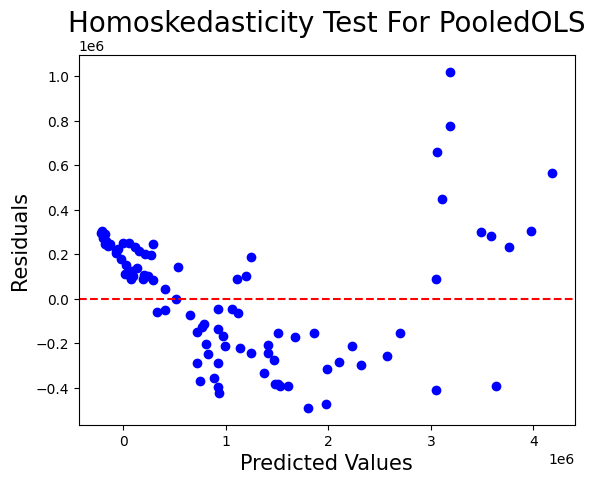

In [26]:
# 3A. Homoskedasticity

 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test For PooledOLS', fontsize = 20)
plt.show()

### **Random effects and Fixed Effects:**

In [14]:
model_re = RandomEffects(exog, endog)
re_res = model_re.fit()
# fixed effects model
model_fe = PanelOLS(exog, endog, entity_effects = True)
fe_res = model_fe.fit()
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                      C   R-squared:                        0.9364
Estimator:              RandomEffects   R-squared (Between):              0.9870
No. Observations:                  90   R-squared (Within):               0.8825
Date:                Wed, Dec 13 2023   R-squared (Overall):              0.9649
Time:                        03:45:21   Log-likelihood                   -1254.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      426.78
Entities:                           6   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                    F(3,87)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             426.78
                            

In [20]:
fittedvals_rand = re_res.predict().fitted_values
residuals_rand = re_res.resids

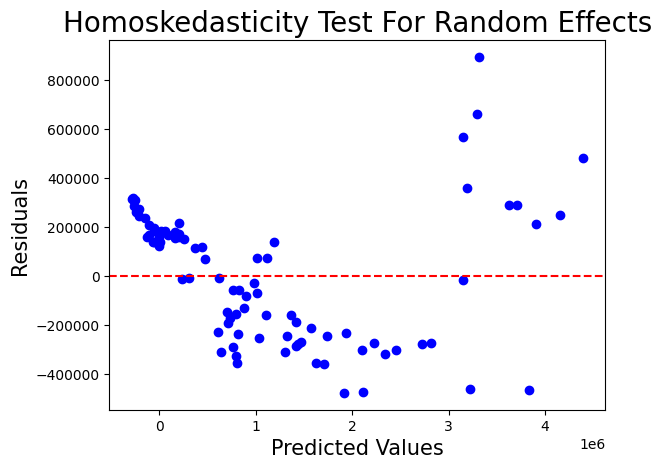

In [24]:
fig, ax = plt.subplots()
ax.scatter(fittedvals_rand, residuals_rand, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test For Random Effects', fontsize = 20)
plt.show()

In [22]:
fittedvals_fe = fe_res.predict().fitted_values
residuals_fe = fe_res.resids

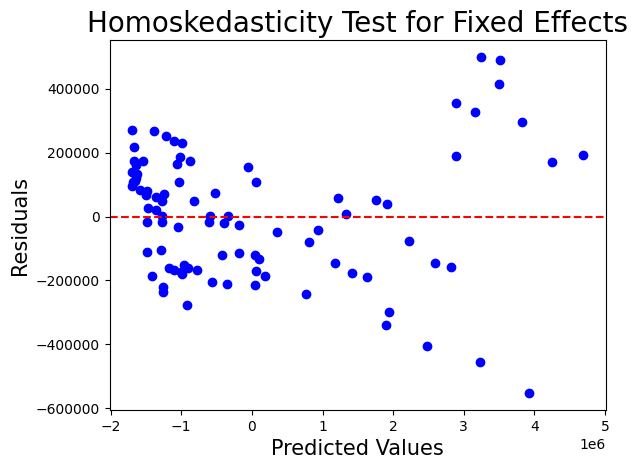

In [27]:
fig, ax = plt.subplots()
ax.scatter(fittedvals_fe, residuals_fe, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test for Fixed Effects', fontsize = 20)
plt.show()

As we can see that Fixed effect performs relatively better as compared to Random effect and PooledOLS. To further confirm the goodness of fit we can also carry out Haussman test but we will not discuss that for this blog.